# Resampling Datetime Data (Core)

In [1]:
#Full Name: Hannah Ploutz

## Imports & Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
import datetime as dt

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [3]:
df = pd.read_excel('Data/london_weather_MODIFIED.xlsx')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


## Tasks

- Part 1: Load the data and create a datetime index

- Part 2: Answer 2 Questions using visualizations and the correct frequency data

## Part 1

**Part 1 - Load the data and make a datetime index.**
1. Convert the date column to datetime dtype.
2. Set the date column as the index.

3. Filter out only the required data:
> 1. Keep only data from the year 2000 or later.
> 2. Keep only the following features:
>> - precipitation
>> - mean_temp
>> - min_temp
>> - max_temp
>> - snow_depth
4. Impute any missing values.
- Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [4]:
#covert date column to datetime and formt it with the Y/m/d strfrtime formatter
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
df.head(1)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00


In [6]:
#set the date column as the index
df = df.set_index("date")
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [7]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [8]:
#keep data from year 2000 and later
df = df.loc[df.index.year > 1999]

In [9]:
df.tail()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
2020-12-30,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN
2020-12-31,7.00,1.30,34.00,1.50,-0.80,-3.10,0.00,"100,500.00",NaN


In [10]:
#drop unneeded features
df = df.drop(columns=['cloud_cover','sunshine','global_radiation','pressure'])

In [11]:
df.head(1)

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.80,7.00,4.90,0.00,0.00


In [12]:
#view the missing values as a % per column
(df.isnull().sum() / len(df)) * 100

max_temp         5.08
mean_temp        5.46
min_temp         5.03
precipitation    5.08
snow_depth      22.84
dtype: float64

In [13]:
df.describe()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
count,"7,281.00","7,252.00","7,285.00","7,281.00","5,919.00"
mean,15.81,11.91,8.00,1.72,0.02
std,6.53,5.67,5.24,3.68,0.31
min,-1.20,-4.10,-9.40,0.00,0.00
25%,10.80,7.60,4.10,0.00,0.00
50%,15.60,11.80,8.20,0.00,0.00
75%,20.70,16.40,12.10,1.80,0.00
max,37.90,29.00,22.30,51.60,12.00


In [14]:
# Resample as day
df_day = df.resample('D').last()

In [15]:
# Impute 'max_temp' with its mean value
df_day['max_temp'] = df_day['max_temp'].fillna(df_day['max_temp'].mean())

# Impute 'mean_temp' and 'precipitation' with their mean values
df_day[['mean_temp', 'precipitation']] = df_day[['mean_temp', 'precipitation']].fillna(df_day[['mean_temp', 'precipitation']].mean())

# Impute 'min_temp' with its minimum value
df_day['min_temp'] = df_day['min_temp'].fillna(df_day['min_temp'].min())

# Impute 'snow_depth' with its mean value
df_day['snow_depth'] = df_day['snow_depth'].fillna(df_day['snow_depth'].mean())

In [16]:
df_day.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq='D')

In [17]:
df_day.shape

(7671, 5)

In [18]:
df_day.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

In [19]:
## Change the default figure size to something wider (12,5)
plt.rcParams['figure.figsize'] = (12,5)

<AxesSubplot: xlabel='date'>

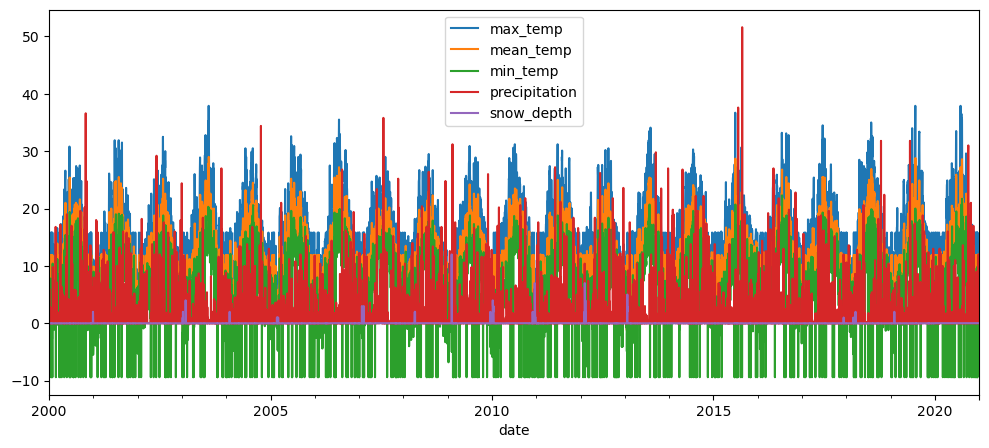

In [20]:
df_day.plot()

## Part 2

**Part 2 Answer the Questions with Visualizations (Using the Correct Frequency)**
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
- If there is a specific time period, plot only that time period.

### Question 1

**Q1: What month had the most precipitation between 2000 through 2010?**
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
- Make sure to add a legend so that your label is visible.

**Q1 Visualization Requirements** 
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:

Create a wide figure (e.g. figsize=(12,3))
- With the title "Precipitation for 2000-2010"
- With a ylabel of "Inches"

Customize the major xaxis ticks to:
- Have major xaxis ticks every 1 year.
- Use 4-digit years for the labels
- Rotate the major ticks' labels 90 degrees.

Customize the minor xaxis ticks to:
- Have minor xaxis ticks every 3 months
- Do not label the minor ticks.

In [21]:
# Subset the dataframe to include data from 2000 through 2010
df_2000_2010 = df_day.loc['2000-01-01':'2010-12-31']

In [22]:
# Resample the data on a monthly frequency
df_monthly = df_2000_2010.resample('M').sum()

In [23]:
# Find the month with max precipitation
max_precip_date = df_monthly['precipitation'].idxmax()
max_precip_value = df_monthly['precipitation'].max()

Text(0, 0.5, 'Inches')

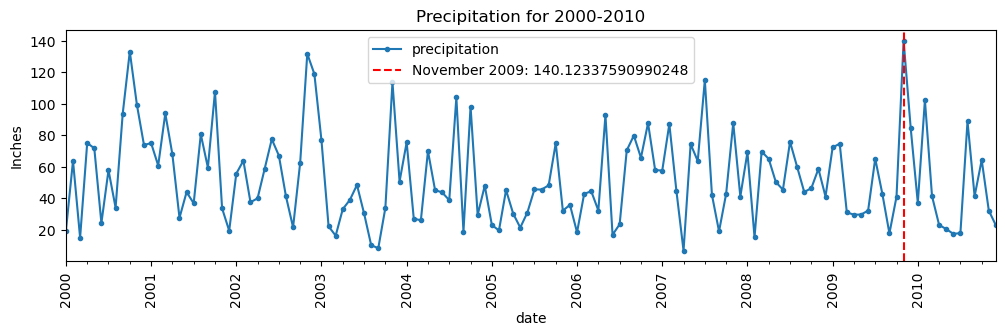

In [24]:
# Create a wide figure
fig, ax = plt.subplots(figsize=(12, 3))

# Plot only precipitation data
df_monthly['precipitation'].plot(ax=ax, style='.-')

# Add a vertical line at the month with max precipitation
ax.axvline(x=max_precip_date, color='red', linestyle='--', label=f'{max_precip_date.strftime("%B %Y")}: {max_precip_value}')

plt.xticks(rotation=90)

# Add a legend
ax.legend()

# Set title and y label
ax.set_title("Precipitation for 2000-2010")
ax.set_ylabel("Inches")

- See above graph with changes to showcasing Precipitation, x ticks have the major ticks as years and minor ticks every 3 months, and the year is rotated 90 degrees

### Question 2

**Q2: Which year between 2000-2020 had the coolest average temperature?**
- Resample the data as Yearly frequency.

- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

**Q2 Visualization Requirements**
Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:

Create a wide figure (e.g. figsize=(12,3))
- With the title "Average Temperature"
- With a ylabel of "Degrees"

Customize the major xaxis ticks to:
- Have major xaxis ticks every 5 years.
- Use 4-digit years for the labels
- Rotate the major ticks' labels 90 degrees.

Customize the minor xaxis ticks to:
- Have minor xaxis ticks every 1 year
- Do not label the minor ticks.


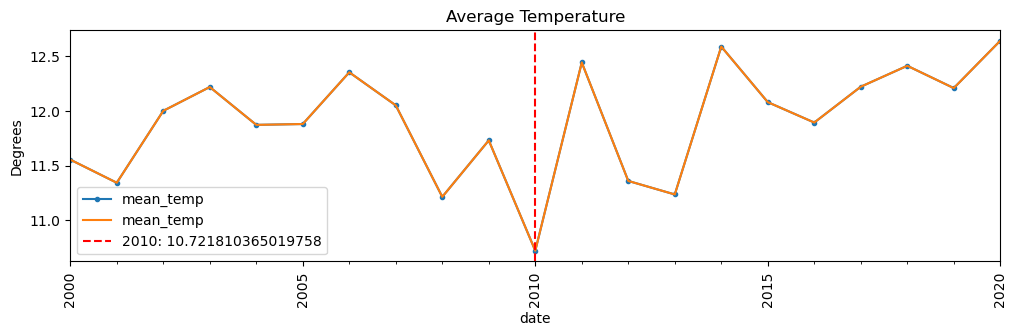

In [25]:
# Subset the dataframe to include data from 2000 through 2020
df_2000_2020 = df_day.loc['2000-01-01':'2020-12-31']

# Resample the data on a yearly frequency
df_yearly = df_2000_2020.resample('Y').mean()

# Find the year with lowest average temperature
min_temp_date = df_yearly['mean_temp'].idxmin()  # using 'mean_temp' instead of 'min_temp'
min_temp_value = df_yearly['mean_temp'].min()  # using 'mean_temp' instead of 'min_temp'

# Create a wide figure
fig, ax = plt.subplots(figsize=(12, 3))

# Plot temperature data
df_yearly['mean_temp'].plot(ax=ax, style='.-')  # using 'mean_temp' instead of 'min_temp'
df_yearly['mean_temp'].plot(ax=ax)

# Add a vertical line at the year with lowest average temperature
ax.axvline(x=min_temp_date, color='red', linestyle='--', label=f'{min_temp_date.year}: {min_temp_value}')

# Add a legend
ax.legend()

# Set title and y label
ax.set_title("Average Temperature")
ax.set_ylabel("Degrees")

plt.xticks(rotation=90)

plt.show()


- See above where the average temparature has the date for every 5 years, labels rotated 90 degrees
- Minor axis ticks every 1 year, minor ticks are also not labeled